## Import packages

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load, Curate & Split Data

In [2]:
# Load the data
data = pd.read_csv('../data/FermentationBiomassProduction.csv')

data = data.drop(['Unnamed: 0', 'Reference year'], axis=1)
print(data.shape)

data = data.dropna()
print(data.shape)

# split into input and output elements
X, y = data.iloc[:, :-1], data.iloc[:, -1]
print(X.shape, y.shape)

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(311, 26)
(277, 26)
(277, 25) (277,)
(221, 25) (221,)
(56, 25) (56,)


In [3]:
56 / 277

0.20216606498194944

## Initialize the XGBoost Ensemble Model

In [4]:
# Build the model
model = xgb.XGBRegressor(
    n_estimators = 400,
    max_depth = 8,
    learning_rate = 0.05,
    subsample = 0.8,
    random_state = 42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Test the model
y_pred = model.predict(X_test_scaled)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Test RMSE: 0.9647263348062476


## Analyze Feature Importance

#### Gain  
Gain = the average improvement in model performance (or loss reduction) when a certain feature is used as part of a tree in an ensemble. More specifically, the improvement when that feature is used to split the data in a tree. Longer bars (higher gain) are associated with features that contributed the most to reducing prediction error.

In [5]:
print(X_train.columns[0])
print(X_train.columns[4])
print(X_train.columns[6])
print(X_train.columns[24])
print(X_train.columns[13])

Inoculum size (cell/ml)
Olive oil (%)
Crude glycerol (%)
Time (h)
Total nitrogen (g/L)


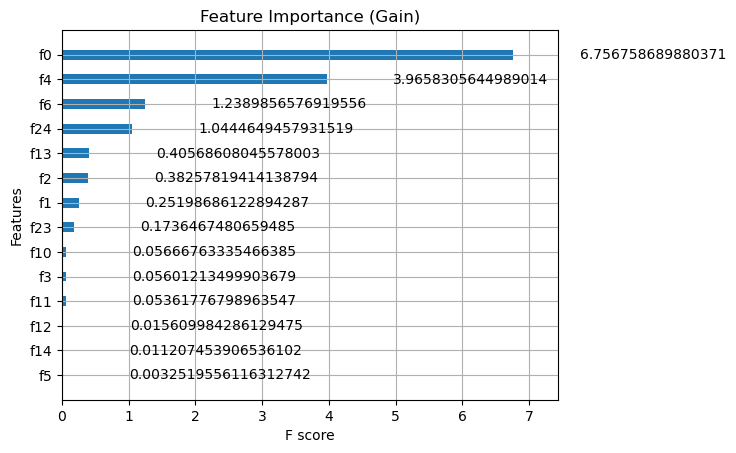

In [6]:
xgb.plot_importance(model, importance_type = 'gain', height = 0.4)
plt.title('Feature Importance (Gain)')
plt.show()

#### Weight  
Weight = the number of times a feature has been used in a split of a tree within the XGBoost ensemble; being a more “direct” and frequency-based indicator of the feature’s influence and contribution to the final prediction.

In [7]:
print(X_train.columns[24])
print(X_train.columns[1])
print(X_train.columns[2])
print(X_train.columns[23])
print(X_train.columns[6])

Time (h)
COD (g/L)
Oil and grease (g/L)
pH
Crude glycerol (%)


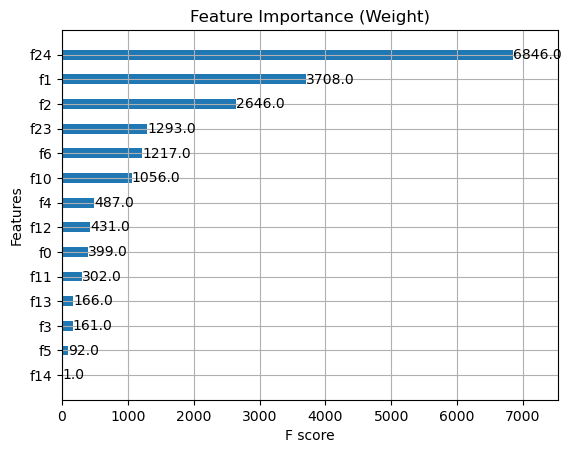

In [8]:
xgb.plot_importance(model, importance_type = 'weight', height = 0.4)
plt.title('Feature Importance (Weight)')
plt.show()

#### Cover  

Cover = the average number of samples (training instances) affected by splits that use a specific feature.

In [9]:
print(X_train.columns[2])
print(X_train.columns[3])
print(X_train.columns[4])
print(X_train.columns[14])
print(X_train.columns[11])

Oil and grease (g/L)
TKN
Olive oil (%)
Mono- sodium glutam ate (g/l)
Yeast extract (g/L)


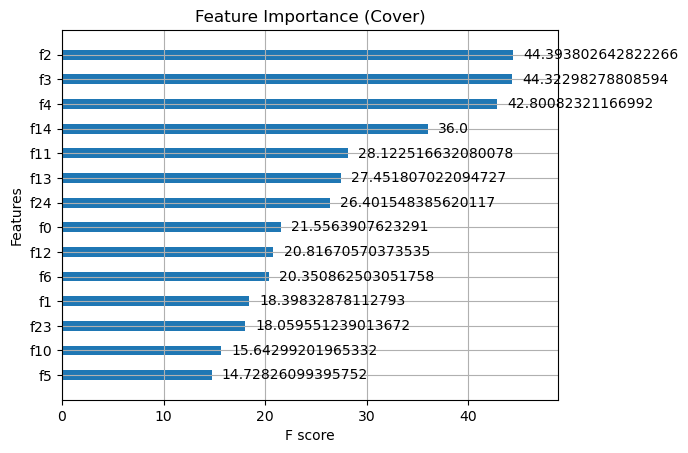

In [10]:
xgb.plot_importance(model, importance_type = 'cover', height = 0.4)
plt.title('Feature Importance (Cover)')
plt.show()